In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
import tensorflow
from tensorflow.keras import Sequential,layers,models,applications,optimizers
from tensorflow.keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator 
import os
import glob
import zipfile
from zipfile import ZipFile

In [3]:
zip_files = ['test1', 'train']
#unzipping the files 
for zip_file in zip_files:
    with ZipFile("../input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [4]:
img_folder = '../working/train'
files = os.listdir(img_folder)
WIDTH=150
HEIGHT=150

In [5]:
targets = list()
full_paths=list()

for file in files:
    target=file.split(".")[0]
    full_path = os.path.join(img_folder,file)
    full_paths.append(full_path)
    targets.append(target)
    
dataset= pd.DataFrame()
dataset['image_path'] = full_paths
dataset['target'] = targets

In [6]:
dataset.head()

,image_path,target
0,../working/train/dog.10180.jpg,dog
1,../working/train/cat.9892.jpg,cat
2,../working/train/dog.2150.jpg,dog
3,../working/train/dog.4859.jpg,dog
4,../working/train/dog.4808.jpg,dog


<AxesSubplot:>

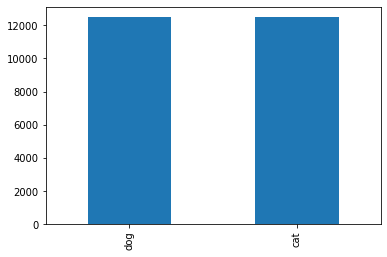

In [7]:
dataset.target.value_counts().plot.bar()

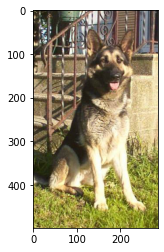

In [8]:
#visualizing rando images from the dataset;
import random
import matplotlib.pyplot as plt
sample= random.choice(full_paths)
plt.imshow(plt.imread((sample)));

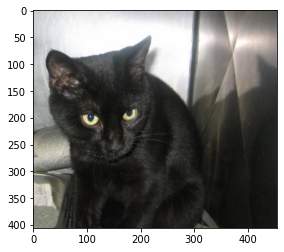

In [9]:
sample= random.choice(full_paths)
plt.imshow(plt.imread((sample)));

In [10]:
#creating a gallery of images of respective labels;
def get_side(img, side_type, side_size=5):
    height, width, channel=img.shape
    if side_type=="horizontal":
        return np.ones((height,side_size,  channel), dtype=np.float32)*255
        
    return np.ones((side_size, width,  channel), dtype=np.float32)*255

def show_gallery(show="both"):
    n=100
    counter=0
    images=list()
    vertical_images=[]
    rng_state = np.random.get_state()
    np.random.shuffle(full_paths)
    np.random.set_state(rng_state)
    np.random.shuffle(targets)
    for path, target in zip(full_paths, targets):
        if target!=show and show!="both":
            continue
        counter=counter+1
        if counter%100==0:
            break
        #Image loading from disk as JpegImageFile file format
        img=load_img(path, target_size=(WIDTH,HEIGHT))
        #Converting JpegImageFile to numpy array
        img=img_to_array(img)
        
        hside=get_side(img, side_type="horizontal")
        images.append(img)
        images.append(hside)

        if counter%10==0:
            himage=np.hstack((images))
            vside=get_side(himage, side_type="vertical")
            vertical_images.append(himage)
            vertical_images.append(vside)
            
            images=list()

    gallery=np.vstack((vertical_images)) 
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    title={"both":"Dogs and Cats",
          "cat": "Cats",
          "dog": "Dogs"}
    plt.title("100 samples of {} of the dataset".format(title[show]))
    plt.imshow(gallery.astype(np.uint8))

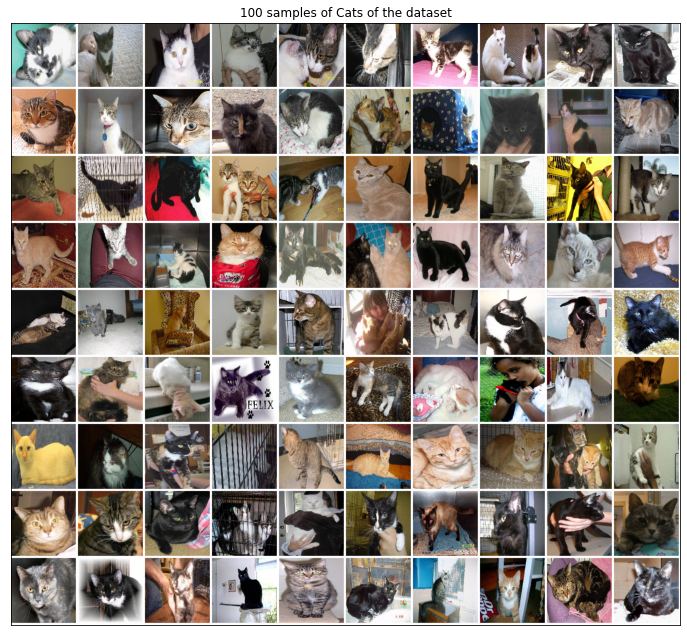

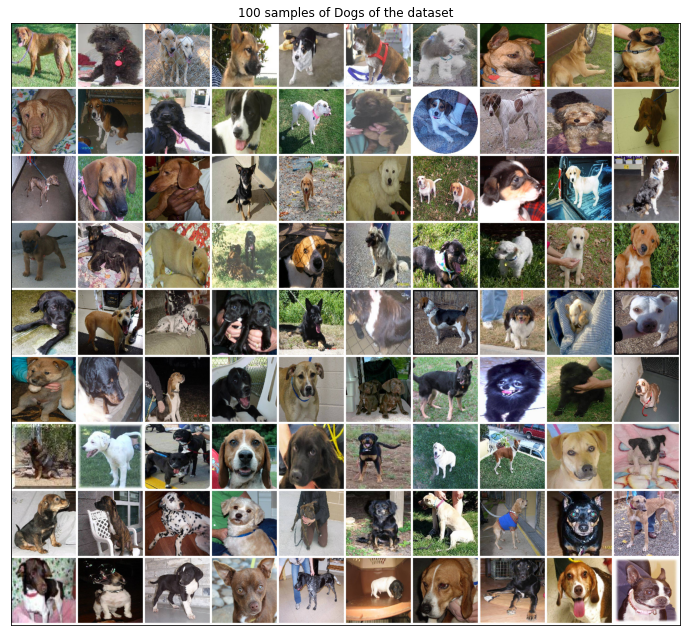

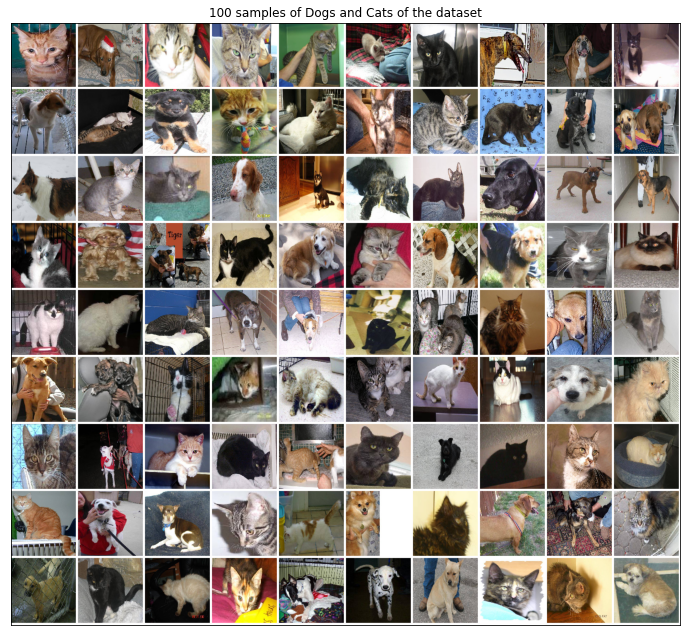

In [11]:
show_gallery(show='cat')
show_gallery(show='dog')
show_gallery(show='both')


When the images in galleries are examined, it is possible to make the following evaluations;

* There are many different types of cats
* There are many different types of dogs
* Some cat (dog) breeds are very similar to some dog (cat) breeds.
* The backgrounds in the images are very different and noisy.
* The difference in exposure of cats and dogs in the images is quite high.

In [12]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(WIDTH,HEIGHT,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))


model.summary()

2022-08-04 19:41:59.617953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-04 19:41:59.739035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-04 19:41:59.739811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        3

2022-08-04 19:41:59.741506: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-04 19:41:59.741797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-04 19:41:59.742559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-04 19:41:59.743347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [13]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])


In [14]:
from sklearn.model_selection import train_test_split
dataset_train,dataset_test = train_test_split(dataset,test_size=0.2,random_state=1)

In [15]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale= 1./255,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_data_generator = train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                        x_col= 'image_path',
                                                        y_col='target',
                                                        target_size=(WIDTH,HEIGHT),
                                                        class_mode='binary',
                                                        batch_size=150)

Found 20000 validated image filenames belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

Found 5000 validated image filenames belonging to 2 classes.


In [17]:
modelHistory = model.fit(train_data_generator,
                                  epochs=30,
                                  validation_data=test_datagenerator,
                                  validation_steps=dataset_test.shape[0]//150,
                                  steps_per_epoch=dataset_train.shape[0]//150)

2022-08-04 19:42:04.262941: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-08-04 19:42:07.363778: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


133/133 [==============================] - 178s 1s/step - loss: 0.8485 - accuracy: 0.5807 - val_loss: 0.7436 - val_accuracy: 0.5099
Epoch 2/30
133/133 [==============================] - 168s 1s/step - loss: 0.6345 - accuracy: 0.6504 - val_loss: 0.7575 - val_accuracy: 0.5362
Epoch 3/30
133/133 [==============================] - 168s 1s/step - loss: 0.5831 - accuracy: 0.6924 - val_loss: 0.7317 - val_accuracy: 0.5659
Epoch 4/30
133/133 [==============================] - 167s 1s/step - loss: 0.5400 - accuracy: 0.7266 - val_loss: 0.6560 - val_accuracy: 0.6844
Epoch 5/30
133/133 [==============================] - 167s 1s/step - loss: 0.4826 - accuracy: 0.7665 - val_loss: 0.5065 - val_accuracy: 0.7556
Epoch 6/30
133/133 [==============================] - 167s 1s/step - loss: 0.4423 - accuracy: 0.7935 - val_loss: 0.5952 - val_accuracy: 0.7418
Epoch 7/30
133/133 [==============================] - 165s 1s/step - loss: 0.3993 - accuracy: 0.8167 - val_loss: 0.4146 - val_accuracy: 0.8091
Epoch 8/30

Train Accuracy = 94.01%

Test Accuracy =  93.43%


In [21]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

Train Accuracy:0.940
Test Accuracy:0.934


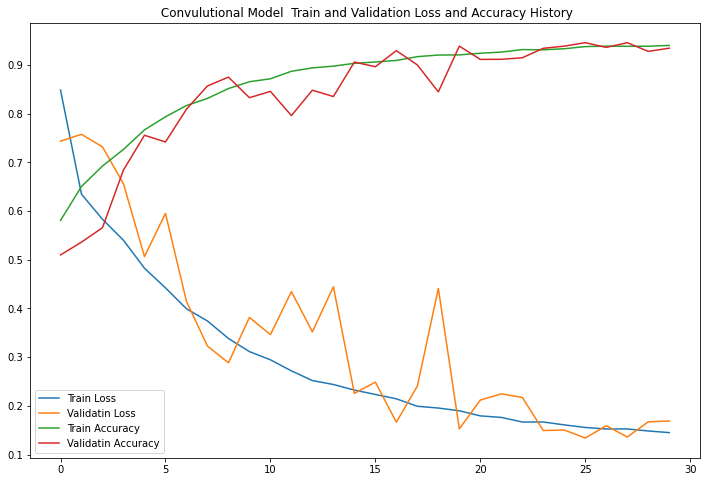

In [22]:
print("Train Accuracy:{:.3f}".format(modelHistory.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(modelHistory.history['val_accuracy'][-1]))
show_model_history(modelHistory=modelHistory, model_name="")